
# Import Libraries
---



In [120]:
!pip install fuzzywuzzy python-Levenshtein

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import charset_normalizer
import fuzzywuzzy

In [122]:
df = pd.read_csv("/content/hotel_bookings.csv")

In [123]:
hotel_bookings = df.copy()

In [124]:
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [125]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# missing Values

In [126]:
hotel_bookings.drop("company" ,axis =1 ,inplace = True)

In [127]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [128]:
# fill missing values in  'children', and 'babies' with 0
hotel_bookings[[ 'children', 'babies']] = hotel_bookings[[ 'children', 'babies']].fillna(0)

In [129]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [130]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [131]:
hotel_bookings['agent'] = hotel_bookings['agent'].fillna(-1.0)

In [132]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [133]:
hotel_bookings['market_segment'].value_counts()

,count
market_segment,
Online TA,56477
Offline TA/TO,24219
Groups,19811
Direct,12606
Corporate,5295
Complementary,743
Aviation,237
Undefined,2


In [134]:
hotel_bookings.loc[hotel_bookings['country'].isnull() & (hotel_bookings['market_segment'] == 'Groups'), 'country'] = 'PRT'

In [135]:
most_common_country_online_ta = hotel_bookings[hotel_bookings['market_segment'] == 'Online TA']['country'].mode()[0]
print(most_common_country_online_ta)

PRT


In [136]:
hotel_bookings.loc[hotel_bookings['country'].isnull() & (hotel_bookings['market_segment'] == 'Online TA'), 'country'] = 'PRT'

In [137]:
hotel_bookings.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [138]:
hotel_bookings['market_segment'].value_counts()

,count
market_segment,
Online TA,56477
Offline TA/TO,24219
Groups,19811
Direct,12606
Corporate,5295
Complementary,743
Aviation,237
Undefined,2


In [139]:
most_common_country_offline_ta = hotel_bookings[hotel_bookings['market_segment'] == 'Aviation']['country'].mode()[0]
print(most_common_country_offline_ta)

PRT


In [140]:
hotel_bookings["country"].fillna("PRT", inplace=True)

/tmp/ipython-input-1594042468.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hotel_bookings["country"].fillna("PRT", inplace=True)


In [141]:
hotel_bookings.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [142]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# `Number of bookings with zero guests`

In [143]:
# Select rows where 'adults', 'children', and 'babies' are all 0
zero_guests_count = len(hotel_bookings[(hotel_bookings['adults'] == 0) & (hotel_bookings['children'] == 0) & (hotel_bookings['babies'] == 0)])

print(f"Number of bookings with zero guests: {zero_guests_count}")

Number of bookings with zero guests: 180


In [144]:
# Create a boolean mask to identify rows where all three columns are 0
zero_guests = (hotel_bookings['adults'] == 0) & (hotel_bookings['children'] == 0) & (hotel_bookings['babies'] == 0)

# Drop the rows that match the condition
hotel_bookings_cleaned = hotel_bookings.loc[~zero_guests]

# Display the new number of rows
print(f"New number of rows: {len(hotel_bookings_cleaned)}")

New number of rows: 119210


In [145]:
hotel_bookings_cleaned.shape

(119210, 31)

In [146]:
hotel_bookings_cleaned.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,-1.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,-1.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,-1.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Datetime

In [147]:
# Convert month names to numbers
hotel_bookings_cleaned['arrival_date_month'] = hotel_bookings_cleaned['arrival_date_month'].replace({
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
})

# Combine the three date columns into a single datetime column
hotel_bookings_cleaned['arrival_date'] = pd.to_datetime(
    hotel_bookings_cleaned['arrival_date_year'].astype(str) + '-' +
    hotel_bookings_cleaned['arrival_date_month'].astype(str) + '-' +
    hotel_bookings_cleaned['arrival_date_day_of_month'].astype(str)
)

/tmp/ipython-input-1710672130.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hotel_bookings_cleaned['arrival_date_month'] = hotel_bookings_cleaned['arrival_date_month'].replace({
/tmp/ipython-input-1710672130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_bookings_cleaned['arrival_date_month'] = hotel_bookings_cleaned['arrival_date_month'].replace({
/tmp/ipython-input-1710672130.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [148]:
 hotel_bookings_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119210 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119210 non-null  object        
 1   is_canceled                     119210 non-null  int64         
 2   lead_time                       119210 non-null  int64         
 3   arrival_date_year               119210 non-null  int64         
 4   arrival_date_month              119210 non-null  int64         
 5   arrival_date_week_number        119210 non-null  int64         
 6   arrival_date_day_of_month       119210 non-null  int64         
 7   stays_in_weekend_nights         119210 non-null  int64         
 8   stays_in_week_nights            119210 non-null  int64         
 9   adults                          119210 non-null  int64         
 10  children                        119210 non-null  float64     

In [149]:
hotel_bookings_cleaned.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis=1, inplace=True)


/tmp/ipython-input-770445049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_bookings_cleaned.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis=1, inplace=True)


In [150]:
hotel_bookings_cleaned['reservation_status_date'] = pd.to_datetime(hotel_bookings_cleaned['reservation_status_date'])

/tmp/ipython-input-1032636321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_bookings_cleaned['reservation_status_date'] = pd.to_datetime(hotel_bookings_cleaned['reservation_status_date'])


In [151]:
hotel_bookings_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119210 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119210 non-null  object        
 1   is_canceled                     119210 non-null  int64         
 2   lead_time                       119210 non-null  int64         
 3   arrival_date_week_number        119210 non-null  int64         
 4   stays_in_weekend_nights         119210 non-null  int64         
 5   stays_in_week_nights            119210 non-null  int64         
 6   adults                          119210 non-null  int64         
 7   children                        119210 non-null  float64       
 8   babies                          119210 non-null  int64         
 9   meal                            119210 non-null  object        
 10  country                         119210 non-null  object      

In [152]:
hotel_bookings_cleaned.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,27,0,0,2,0.0,0,BB,...,No Deposit,-1.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,27,0,0,2,0.0,0,BB,...,No Deposit,-1.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,27,0,1,1,0.0,0,BB,...,No Deposit,-1.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,27,0,1,1,0.0,0,BB,...,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,27,0,2,2,0.0,0,BB,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


# Unique

# EXtract

In [153]:
hotel_bookings_cleaned['is_same_room'] = hotel_bookings_cleaned['reserved_room_type'] == hotel_bookings_cleaned['assigned_room_type']

/tmp/ipython-input-1646156952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_bookings_cleaned['is_same_room'] = hotel_bookings_cleaned['reserved_room_type'] == hotel_bookings_cleaned['assigned_room_type']


In [154]:
hotel_bookings_cleaned['is_same_room'].value_counts()

,count
is_same_room,
True,104414
False,14796


In [155]:
different_rooms = hotel_bookings_cleaned[hotel_bookings_cleaned['is_same_room'] == False]
room_change_counts = different_rooms.groupby(['reserved_room_type', 'assigned_room_type']).size().sort_values(ascending=False).head(10)
print(room_change_counts)

reserved_room_type  assigned_room_type
A                   D                     7540
                    C                     1444
                    E                     1155
                    B                     1121
D                   E                      686
A                   F                      417
E                   F                      404
D                   A                      311
A                   I                      211
D                   F                      204
dtype: int64


In [156]:
different_rooms.groupby('hotel').size()

,0
hotel,
City Hotel,7078
Resort Hotel,7718


In [157]:
different_rooms.groupby(['hotel', 'reserved_room_type', 'assigned_room_type']).size().sort_values(ascending=False).head(10)

hotel         reserved_room_type  assigned_room_type
City Hotel    A                   D                     3984
Resort Hotel  A                   D                     3556
                                  C                     1303
City Hotel    A                   B                      968
Resort Hotel  A                   E                      722
City Hotel    A                   E                      433
Resort Hotel  D                   E                      388
              E                   F                      337
City Hotel    D                   E                      298
                                  A                      291
dtype: int64

In [158]:
different_rooms.groupby(['reserved_room_type', 'assigned_room_type'])['is_canceled'].mean().sort_values(ascending=False).head(10)

,,is_canceled
reserved_room_type,assigned_room_type,
L,C,1.000000
F,D,0.250000
E,H,0.250000
G,A,0.200000
E,A,0.200000
C,G,0.200000
D,K,0.137931
A,B,0.130241
C,I,0.100000


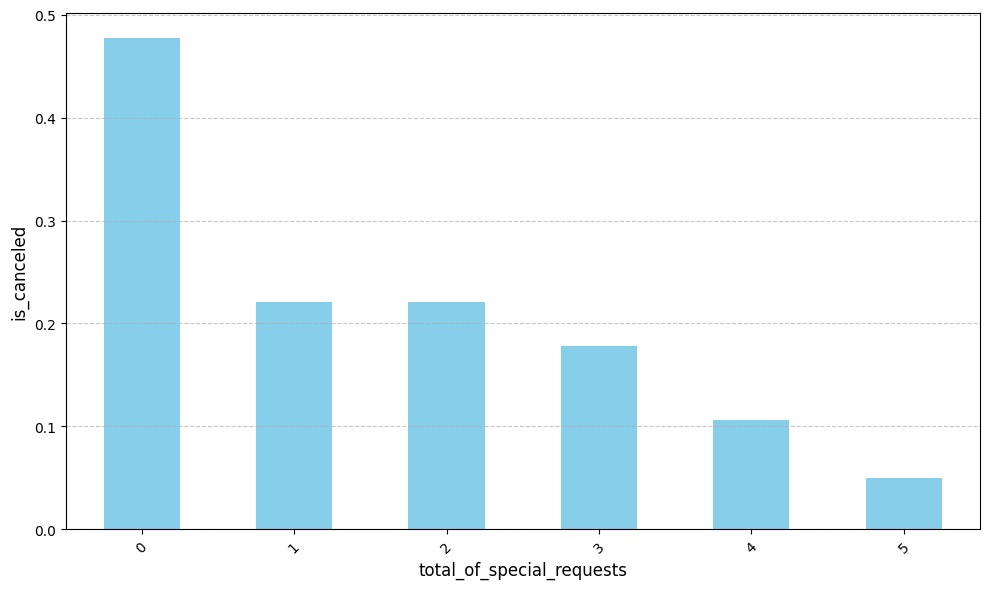

In [163]:

plt.figure(figsize=(10, 6))
hotel_bookings_cleaned.groupby('total_of_special_requests')['is_canceled'].mean().plot(kind='bar', color='skyblue')

plt.xlabel('total_of_special_requests', fontsize=12)
plt.ylabel('is_canceled', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


/tmp/ipython-input-821675103.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_bookings_cleaned['adr_category'] = pd.cut(hotel_bookings_cleaned['adr'], bins=bins, labels=labels, right=False)
/tmp/ipython-input-821675103.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adr_cancellation_rate = hotel_bookings_cleaned.groupby('adr_category')['is_canceled'].mean()
/tmp/ipython-input-821675103.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current

adr_category
0-50        0.210766
51-100      0.381940
101-150     0.400236
151-200     0.376578
201-300     0.390778
301-500     0.306620
501-1000    0.000000
Name: is_canceled, dtype: float64


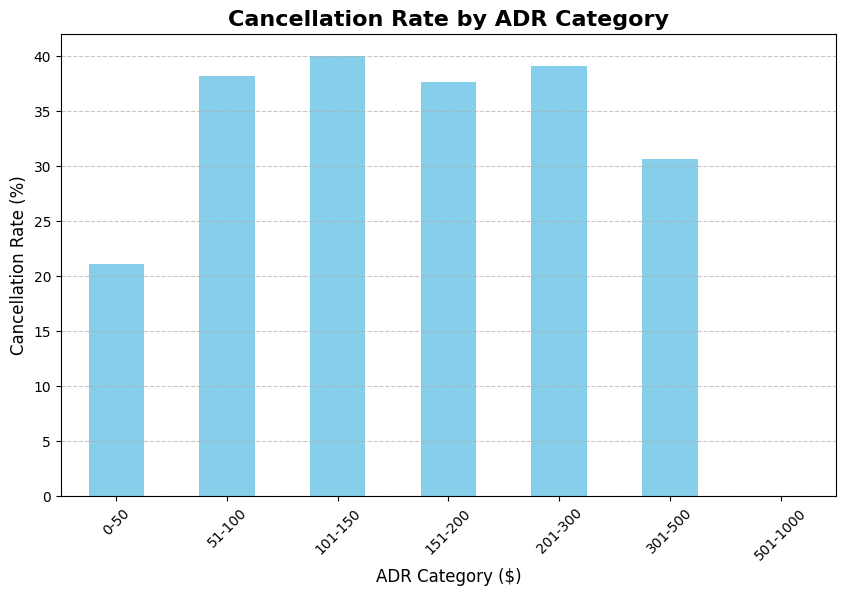

In [164]:
# Create price categories (bins)
bins = [0, 50, 100, 150, 200, 300, 500, 1000]
labels = ['0-50', '51-100', '101-150', '151-200', '201-300', '301-500', '501-1000']
hotel_bookings_cleaned['adr_category'] = pd.cut(hotel_bookings_cleaned['adr'], bins=bins, labels=labels, right=False)

# Calculate the cancellation rate for each price category
adr_cancellation_rate = hotel_bookings_cleaned.groupby('adr_category')['is_canceled'].mean()

print(adr_cancellation_rate)

# Calculate the cancellation rate for each price category
adr_cancellation_rate = hotel_bookings_cleaned.groupby('adr_category')['is_canceled'].mean() * 100

# Create the bar chart
plt.figure(figsize=(10, 6))
adr_cancellation_rate.plot(kind='bar', color='skyblue')
plt.title('Cancellation Rate by ADR Category', fontsize=16, fontweight='bold')
plt.xlabel('ADR Category ($)', fontsize=12)
plt.ylabel('Cancellation Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


In [165]:
booking_changes_by_channel = hotel_bookings_cleaned.groupby('distribution_channel')['booking_changes'].mean()
print(booking_changes_by_channel)

distribution_channel
Corporate    0.359946
Direct       0.392444
GDS          0.093264
TA/TO        0.183499
Undefined    0.000000
Name: booking_changes, dtype: float64


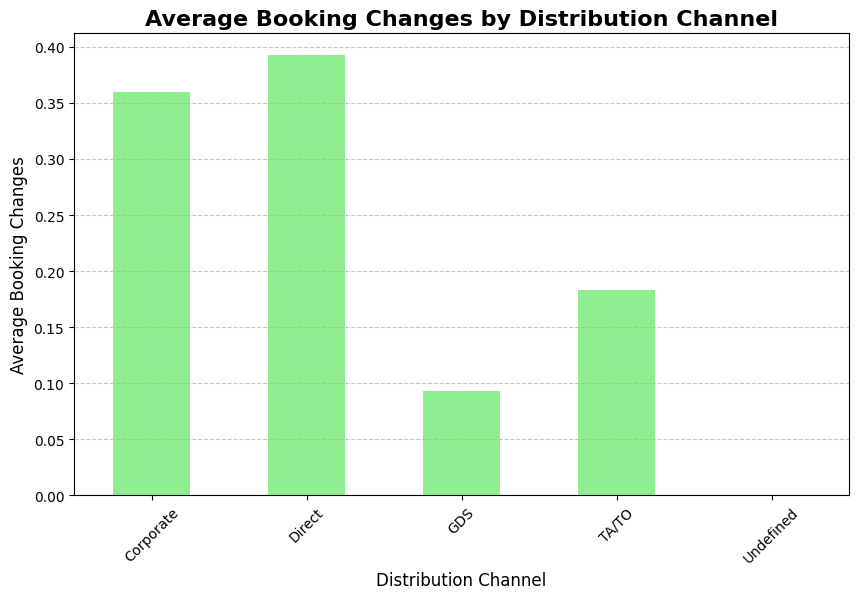

In [166]:
booking_changes_by_channel = hotel_bookings_cleaned.groupby('distribution_channel')['booking_changes'].mean()

# Create the bar chart
plt.figure(figsize=(10, 6))
booking_changes_by_channel.plot(kind='bar', color='lightgreen')
plt.title('Average Booking Changes by Distribution Channel', fontsize=16, fontweight='bold')
plt.xlabel('Distribution Channel', fontsize=12)
plt.ylabel('Average Booking Changes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

market_segment
Aviation          22.127660
Complementary     12.225275
Corporate         18.761833
Direct            15.371165
Groups            61.108585
Offline TA/TO     34.331321
Online TA         36.758970
Undefined        100.000000
Name: is_canceled, dtype: float64


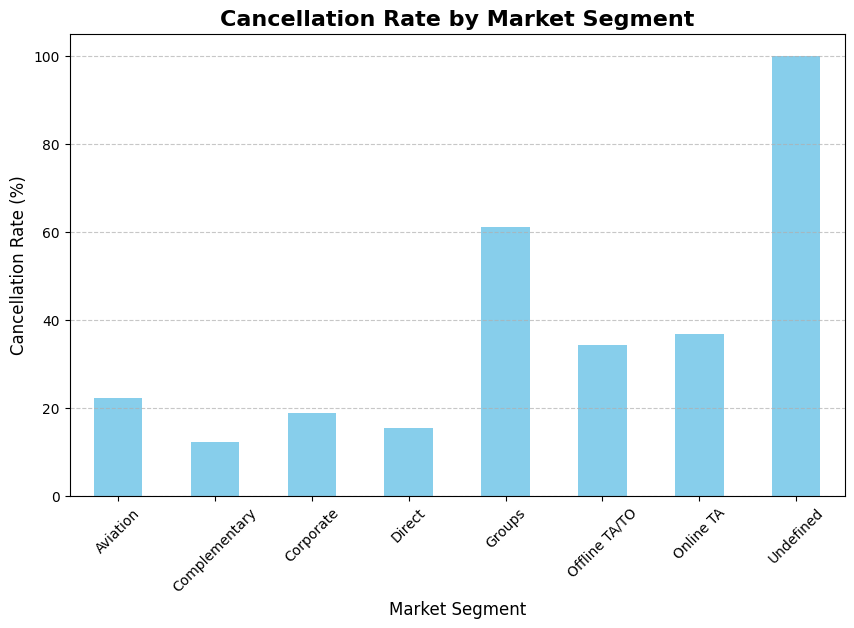

In [167]:
# Calculate the cancellation rate for each market segment
cancellation_by_market = hotel_bookings_cleaned.groupby('market_segment')['is_canceled'].mean() * 100

print(cancellation_by_market)

# Create the bar chart
plt.figure(figsize=(10, 6))
cancellation_by_market.plot(kind='bar', color='skyblue')
plt.title('Cancellation Rate by Market Segment', fontsize=16, fontweight='bold')
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Cancellation Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [170]:
hotel_bookings_cleaned.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,is_same_room,adr_category
0,Resort Hotel,0,342,27,0,0,2,0.0,0,BB,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,True,0-50
1,Resort Hotel,0,737,27,0,0,2,0.0,0,BB,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,True,0-50
2,Resort Hotel,0,7,27,0,1,1,0.0,0,BB,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,False,51-100
3,Resort Hotel,0,13,27,0,1,1,0.0,0,BB,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,True,51-100
4,Resort Hotel,0,14,27,0,2,2,0.0,0,BB,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,True,51-100


# Insights

 Here's a summary of the key insights we've uncovered during our data
 analysis:

Illogical Data: We found and removed 180 bookings with zero guests, which were illogical data points.

Room Changes: We discovered that a significant number of bookings (around 12%) received a different room than the one they reserved.

Downgrades are the Main Issue: The most frequent room change is a downgrade from room type A to room type D. This is a major finding and a potential source of customer dissatisfaction.

Hotel Type Matters: We found that Resort Hotels have a higher number of total room changes than City Hotels.

Downgrades and Cancellations: We proved that a downgrade significantly increases the risk of a cancellation. In fact, some specific downgrades had a 100% cancellation rate. **

The more special requests a customer makes, the more committed they are to the reservation and the lower the cancellation rate.

This is because customers who take the time to write special requests are likely to be highly engaged in the reservation and are therefore less likely to cancel. This provides the hotel with valuable information about customer behavior.

Bookings made through the Direct and Corporate distribution channels have a significantly higher average number of booking changes compared to other channels like TA/TO and GDS. This finding suggests a difference in customer behavior or booking flexibility across different acquisition channels. Customers who book directly or via a corporation may have easier access to modify their reservations, or they might simply be more prone to adjusting their plans.

Business Impact: To improve operational efficiency, hotels should closely monitor these specific channels. By understanding the reasons behind the frequent changes, they can potentially streamline the modification process and reduce the workload on staff.

Groups have the highest cancellation rate, around 61%. This means that group bookings are more likely to be canceled.

Online TA and Offline TA/TO also have high cancellation rates, around 34% and 37%.

Undefined has a 100% cancellation rate, which is a very important point that needs to be analyzed to understand its cause.

Other segments, such as Corporate and Direct, have much lower cancellation rates.